ChEn-1070: Introduction to Chemical Engineering Spring 2019 UMass Lowell; Profs. Manohar and de Almeida **26Mar2019**

# 06. Basic Plotting in Python

---
## Table of Contents<a id="toc"></a>
* [Introduction](#introduction)
 + Importing the `matplotlib` package
* [XY Data](#xydata)
---

## Introduction<a id="introduction"></a>
A significant `Python` package that supports plotting is: `Matplotlib`

 + [Home page](https://matplotlib.org/index.html)
 
we will use `Matplotlib` for general plotting. We will access `Matplotlib` with the `import` keyword

 + `import matplotlib`
 
in practice we will use the sub-package `pyplot`

 + `import matplotlib.pyplot as plt`

Here is a very simple plot listing:
 ```python
 import matplotlib.pyplot as plt  # this is an import of the package
 plt.plot([1,2,3,4])
 plt.ylabel('some numbers')
 plt.show()
 ```

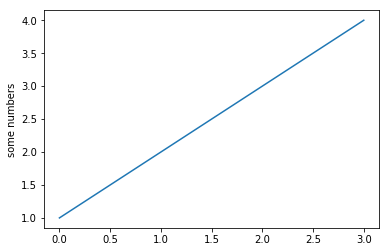

In [5]:
'''Run code'''

import matplotlib.pyplot as plt  # this is an import of the package

plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

Here is a plotting example from the [Matplotlib examples (gallery) site](https://matplotlib.org/gallery/lines_bars_and_markers/simple_plot.html#sphx-glr-gallery-lines-bars-and-markers-simple-plot-py):
 ```python
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.png")
plt.show()
 ```

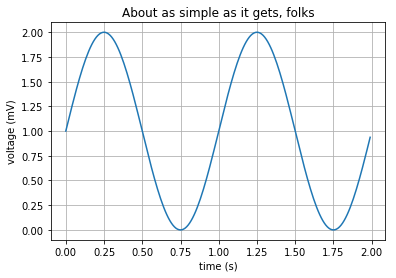

In [37]:
'''Run code'''

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()

ax.plot(t, s) # plotting command

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.png")
plt.show()

## XY Data<a id="xydata"></a>

Defining the *x (abscissa) and the y* (ordinate) data is the first task. We will use past developments.

In [27]:
'''Create a table using mendeleev data'''

try:
    import mendeleev  # creates the `name` mendeleev
except ImportError:
    print('Installing the "mendeleev" package...')
    print('')
    !pip install mendeleev
    import mendeleev
            
import pandas as pd

index = ['atomic number', 'group', 'isotopes', 'period', 'symbol', 'therm. cond.' ]

# columwise data in the form of a dictionary
data = dict() # initialize empty dict to hold data

for i in range(3,11):  # loop over indices 0 to ...
    ele = mendeleev.element(i) # get chemical element with atomic number i+1
    
    column_data = list()  # initialize empty list to hold the column data
    
    column_data.append(ele.atomic_number)  # get and store atomic number
    column_data.append(ele.group_id)       # get and store group id
    column_data.append([iso.mass_number for iso in ele.isotopes]) # get and store isotope mass numbers
    column_data.append(ele.period)         # get and store element period
    column_data.append(ele.symbol)         # get and store element symbol
    
    if ele.thermal_conductivity is not None:
        column_data.append(ele.thermal_conductivity)
    else:
        column_data.append(0.0)
    
    # store column data in the dictionary key: column label
    data[ele.name] = pd.Series(column_data, index) # value: pd.Series
    
#end for i in range(5):

df2 = pd.DataFrame(data) # pass the dictionary to the data frame

In [28]:
df2

,Lithium,Beryllium,Boron,Carbon,Nitrogen,Oxygen,Fluorine,Neon
atomic number,3,4,5,6,7,8,9,10
group,1,2,13,14,15,16,17,18
isotopes,"[6, 7]",[9],"[10, 11]","[12, 13, 14]","[14, 15]","[16, 17, 18]",[19],"[20, 21, 22]"
period,2,2,2,2,2,2,2,2
symbol,Li,Be,B,C,N,O,F,Ne
therm. cond.,84.8,201,27.4,1.59,0.026,0.027,0.028,0


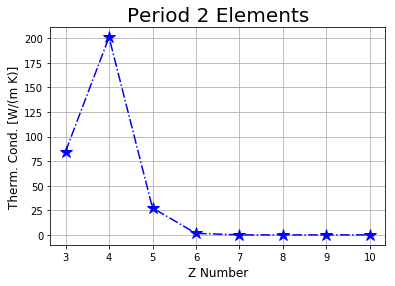

In [74]:
'''Plot Thermal Conductivity versus Atomic Number'''

import matplotlib.pyplot as plt

plt.figure(1)     # create a figure placeholder

x_data = df2.loc['atomic number']
y_data = df2.loc['therm. cond.'] 

plt.plot( x_data, y_data, '-.',color='blue', marker='*',markersize=12  )

plt.title('Period 2 Elements',fontsize=20)
plt.xlabel('Z Number',fontsize=12)
plt.ylabel('Therm. Cond. [W/(m K)]',fontsize=12)
plt.grid(True)
plt.show()

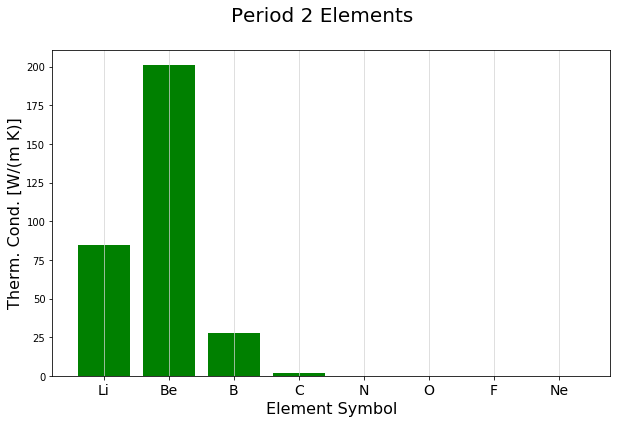

In [75]:
'''Plot Thermal Conductivity versus Element Symbol'''

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))

ax.bar(x_data, y_data, color='green')

plt.xticks( x_data, df2.loc['symbol'], rotation=0,fontsize=14)

ax.set_ylabel('Therm. Cond. [W/(m K)]',fontsize=16)
ax.set_xlabel('Element Symbol',fontsize=16)
ax.xaxis.grid(True,linestyle='-',which='major',color='lightgrey',alpha=0.9)
fig.suptitle('Period 2 Elements',fontsize=20)
plt.show()

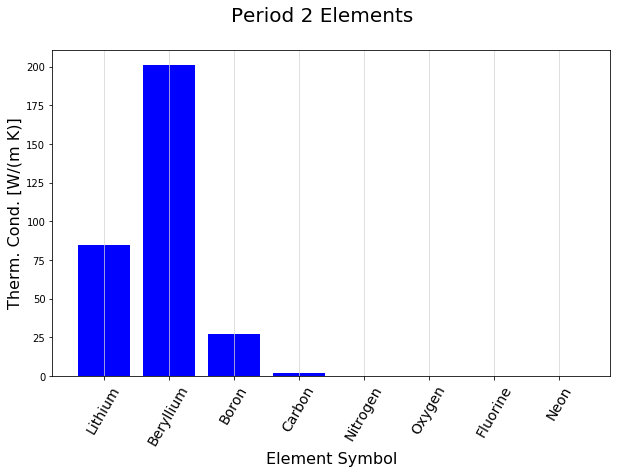

In [77]:
'''Plot Thermal Conductivity versus Atomic Number'''

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))

ax.bar(x_data, y_data, color='blue')

plt.xticks( x_data, df2.columns, rotation=60,fontsize=14)

ax.set_ylabel('Therm. Cond. [W/(m K)]',fontsize=16)
ax.set_xlabel('Element Symbol',fontsize=16)
ax.xaxis.grid(True,linestyle='-',which='major',color='lightgrey',alpha=0.9)
fig.suptitle('Period 2 Elements',fontsize=20)
plt.show()